In [2]:
import pandas as pd
import re
import string
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
stopwords = nltk. corpus.stopwords.words('arabic')
from nltk.stem.isri import ISRIStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
nltk.download('wordnet')
pd.set_option('display.max_colwidth',100)
ps = nltk.ISRIStemmer()
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arwaalgethami/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# import the data
Lyrics_df = pd.read_csv('/Users/arwaalgethami/Desktop/Capstone1/arabicLyrics.csv')

In [4]:
#what is the shape of the dataset?
print('Input data has {} rows and {} columns'. format(len(Lyrics_df), len(Lyrics_df.columns)))

Input data has 527896 rows and 9 columns


In [5]:
Lyrics_df.head()

songID  Singer     SongTitle SongWriter     Composer  LyricsOrder  \
0    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            2   
1    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            3   
2    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            4   
3    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            5   
4    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            6   

                                 Lyrics SingerNationality SongDialect  
0  اروح لاحبابي والاقي الفرح ساكن عينهم           Morocco    Meghribi  
1     ابتسم لافراحهم وانا من الهم احترق           Morocco    Meghribi  
2     واسأل جروحي من ترى حس بعذابي منهم           Morocco    Meghribi  
3      وبالحقيقه انصدم محدن معه همي فرق           Morocco    Meghribi  
4     دورت في كل الوجيه حسيت غربه بينهم           Morocco    Meghribi

In [6]:
def clean_Lyrics(Lyrics):
    Lyrics = "".join([word.lower() for word in Lyrics if word not in string.punctuation])
    punctuation = ['،؛؟”0123456789“']  
    Lyrics = "".join([word.lower() for word in Lyrics if word not in punctuation])
    tokens = re.split('\W+', Lyrics)
    Lyrics = [word for word in tokens if word not in stopwords]
    regex = re.compile('[^ا-ي]')
    Lyrics = [regex.sub('', word) for word in Lyrics]
    Lyrics = [word for word in Lyrics if len(word) > 0]
    ignore = ['وانت','ربي','انه','الي','كله','كان','منك','ني','انت',
              'وين','اذا','او','عنك','منك','ونا','من','ماهو','فوق','كنت','وفي',
              'الا','وسط','فيك','انك','صار','مني','قبل','مو','ربي','شي','ما','اللي', 'للي', 'بلا'
              'وش','وكل','على','يالي','ماني','فيك','انتي','والله','مثل',]
    Lyrics = [word for word in Lyrics if word not in ignore]
    return Lyrics

Lyrics_df['Clean_Lyrics'] = Lyrics_df['Lyrics']. apply(lambda x: clean_Lyrics(x.lower())) 
Lyrics_df['SongDialect'] = Lyrics_df['SongDialect']. apply(lambda x: x.lower())
Lyrics_df['SingerNationality'] = Lyrics_df['SingerNationality']. apply(lambda x: x.lower())
                                                                 
Lyrics_df.head() 

songID  Singer     SongTitle SongWriter     Composer  LyricsOrder  \
0    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            2   
1    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            3   
2    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            4   
3    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            5   
4    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            6   

                                 Lyrics SingerNationality SongDialect  \
0  اروح لاحبابي والاقي الفرح ساكن عينهم           morocco    meghribi   
1     ابتسم لافراحهم وانا من الهم احترق           morocco    meghribi   
2     واسأل جروحي من ترى حس بعذابي منهم           morocco    meghribi   
3      وبالحقيقه انصدم محدن معه همي فرق           morocco    meghribi   
4     دورت في كل الوجيه حسيت غربه بينهم           morocco    meghribi   

                                  Clean_Lyrics  
0  [اروح, لاحبابي, والاقي, الفرح, ساكن, عينهم]  
1         [ابتسم, لافراحهم, وانا, الهم, احترق]  
2         [واسل, جروحي, ترى, حس, بعذابي, منهم]  
3      [وبالحقيقه, انصدم, محدن, معه, همي, فرق]  
4            [دورت, الوجيه, حسيت, غربه, بينهم]

In [7]:
def lemmatizing(Clean_Lyrics):
    text = " ".join([wn.lemmatize(word) for word in Clean_Lyrics])
    return text
Lyrics_df['Lyrics_lemmatized'] = Lyrics_df['Clean_Lyrics']. apply(lambda x: lemmatizing(x))
             
Lyrics_df.head(10)

songID  Singer     SongTitle SongWriter     Composer  LyricsOrder  \
0    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            2   
1    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            3   
2    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            4   
3    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            5   
4    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            6   
5    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            7   
6    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            8   
7    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد            9   
8    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد           10   
9    1537  ابتسام  اروح لاحبابي      ملامح  بندر بن فهد           11   

                                 Lyrics SingerNationality SongDialect  \
0  اروح لاحبابي والاقي الفرح ساكن عينهم           morocco    meghribi   
1     ابتسم لافراحهم وانا من الهم احترق           morocco    meghribi   
2     واسأل جروحي من ترى حس بعذابي منهم           morocco    meghribi   
3      وبالحقيقه انصدم محدن معه همي فرق           morocco    meghribi   
4     دورت في كل الوجيه حسيت غربه بينهم           morocco    meghribi   
5     مع الأسف محدن ابد حس بعذاباتي ورق           morocco    meghribi   
6      جيت اتعثر بالتعب ابي اشوف يدينهم           morocco    meghribi   
7     ماكنت ابي الا احد يحس بي لو مانطق           morocco    meghribi   
8     وحز فيني اني رجعت لكن رجعت بدونهم           morocco    meghribi   
9       يحز في نفسي بأنه ماسوى جرحي صدق           morocco    meghribi   

                                  Clean_Lyrics  \
0  [اروح, لاحبابي, والاقي, الفرح, ساكن, عينهم]   
1         [ابتسم, لافراحهم, وانا, الهم, احترق]   
2         [واسل, جروحي, ترى, حس, بعذابي, منهم]   
3      [وبالحقيقه, انصدم, محدن, معه, همي, فرق]   
4            [دورت, الوجيه, حسيت, غربه, بينهم]   
5         [السف, محدن, ابد, حس, بعذاباتي, ورق]   
6      [جيت, اتعثر, بالتعب, ابي, اشوف, يدينهم]   
7                [ماكنت, ابي, احد, يحس, مانطق]   
8         [وحز, فيني, اني, رجعت, رجعت, بدونهم]   
9           [يحز, نفسي, بنه, ماسوى, جرحي, صدق]   

                      Lyrics_lemmatized  
0  اروح لاحبابي والاقي الفرح ساكن عينهم  
1        ابتسم لافراحهم وانا الهم احترق  
2         واسل جروحي ترى حس بعذابي منهم  
3      وبالحقيقه انصدم محدن معه همي فرق  
4           دورت الوجيه حسيت غربه بينهم  
5         السف محدن ابد حس بعذاباتي ورق  
6      جيت اتعثر بالتعب ابي اشوف يدينهم  
7               ماكنت ابي احد يحس مانطق  
8         وحز فيني اني رجعت رجعت بدونهم  
9           يحز نفسي بنه ماسوى جرحي صدق

In [8]:
#Create wordcloud for each dialect

In [9]:
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [10]:
texts = Lyrics_df[Lyrics_df['SongDialect']=='gulf'].Lyrics_lemmatized
texts = [''.join(word) for word in texts]
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(texts)))

There are 3612554 words in the combination of all review.


In [11]:
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)

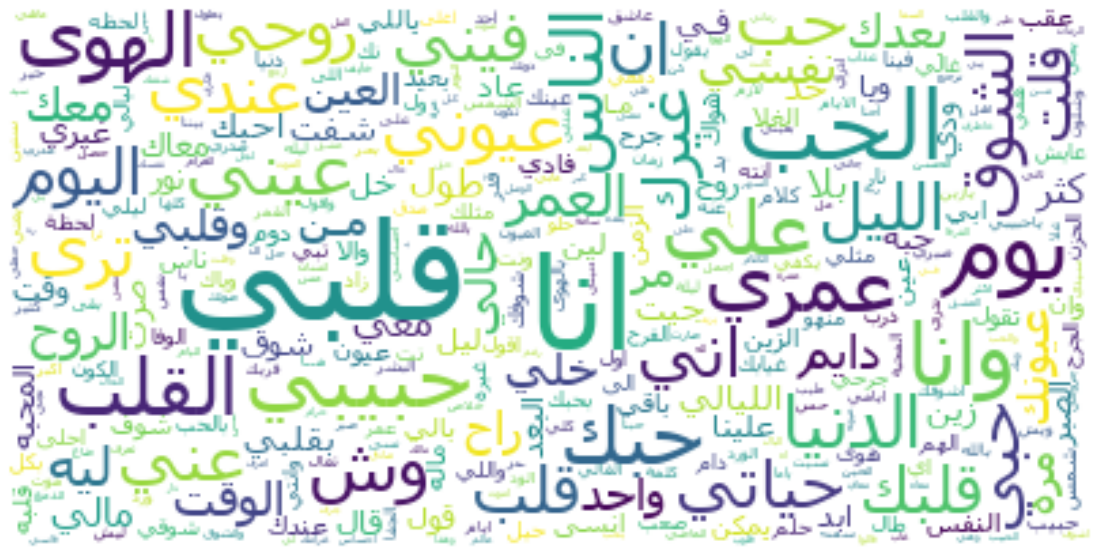

In [12]:
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="/Users/arwaalgethami/Downloads/Tahoma-Font/Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 544437 words in the combination of all review.


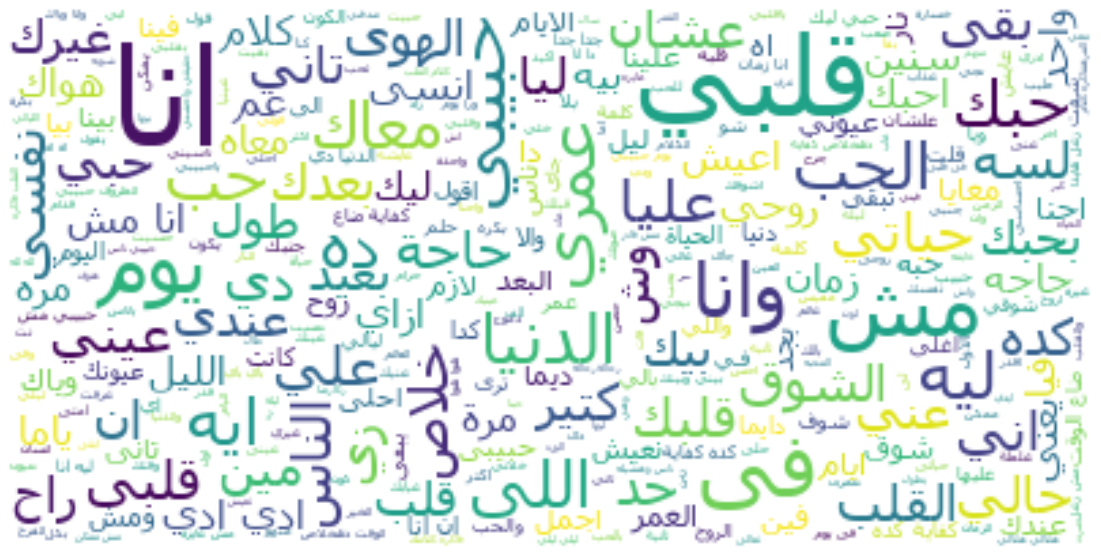

In [13]:
texts = Lyrics_df[Lyrics_df['SongDialect']=='meghribi'].Lyrics_lemmatized
texts = [''.join(word) for word in texts]
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(texts)))
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="/Users/arwaalgethami/Downloads/Tahoma-Font/Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 1690184 words in the combination of all review.


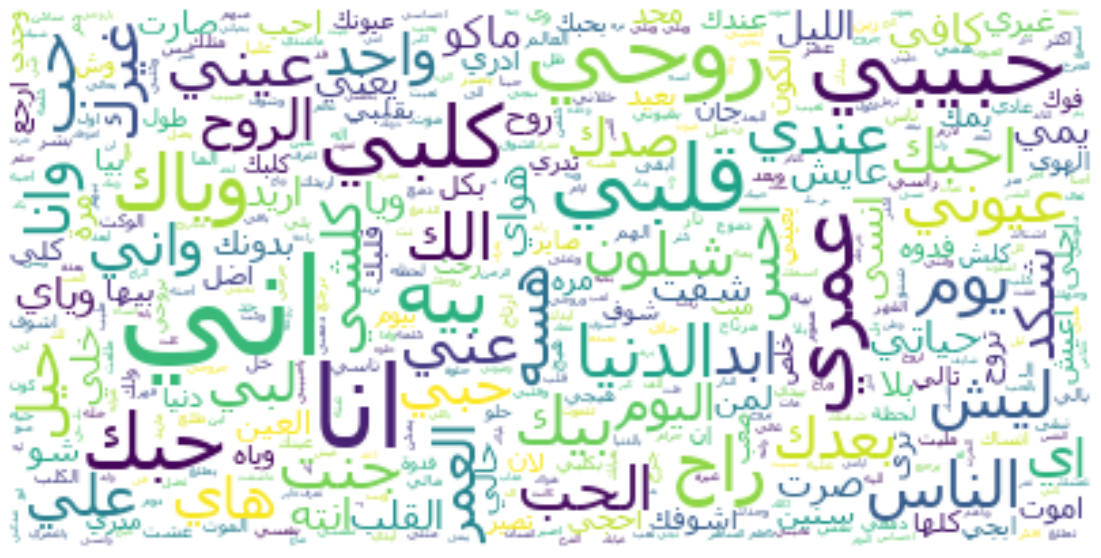

In [14]:
texts = Lyrics_df[Lyrics_df['SongDialect']=='iraqi'].Lyrics_lemmatized
texts = [''.join(word) for word in texts]
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(texts)))
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="/Users/arwaalgethami/Downloads/Tahoma-Font/Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 1092816 words in the combination of all review.


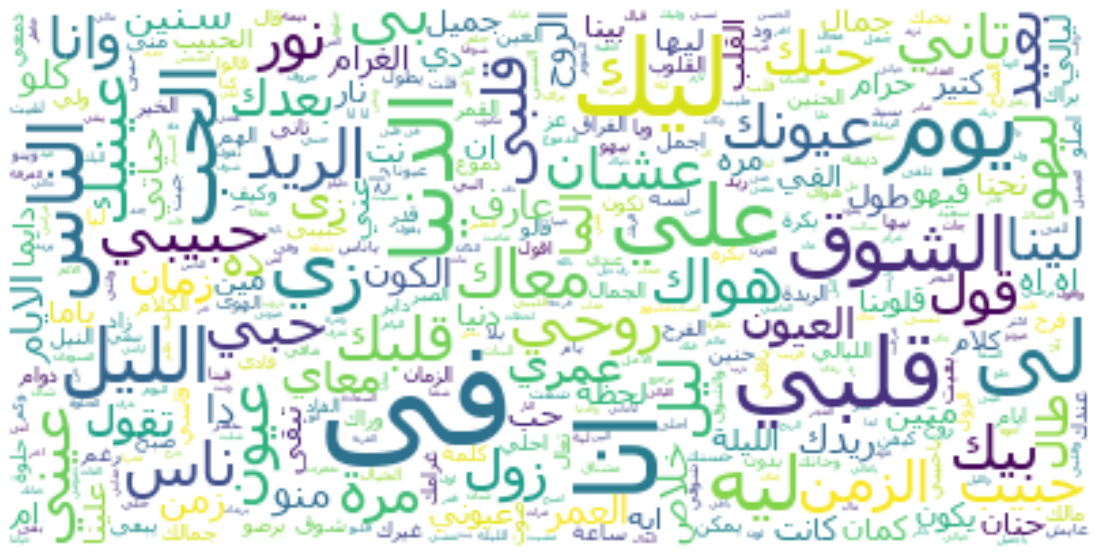

In [15]:
texts = Lyrics_df[Lyrics_df['SongDialect']=='sudan'].Lyrics_lemmatized
texts = [''.join(word) for word in texts]
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(texts)))
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="/Users/arwaalgethami/Downloads/Tahoma-Font/Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 3758015 words in the combination of all review.


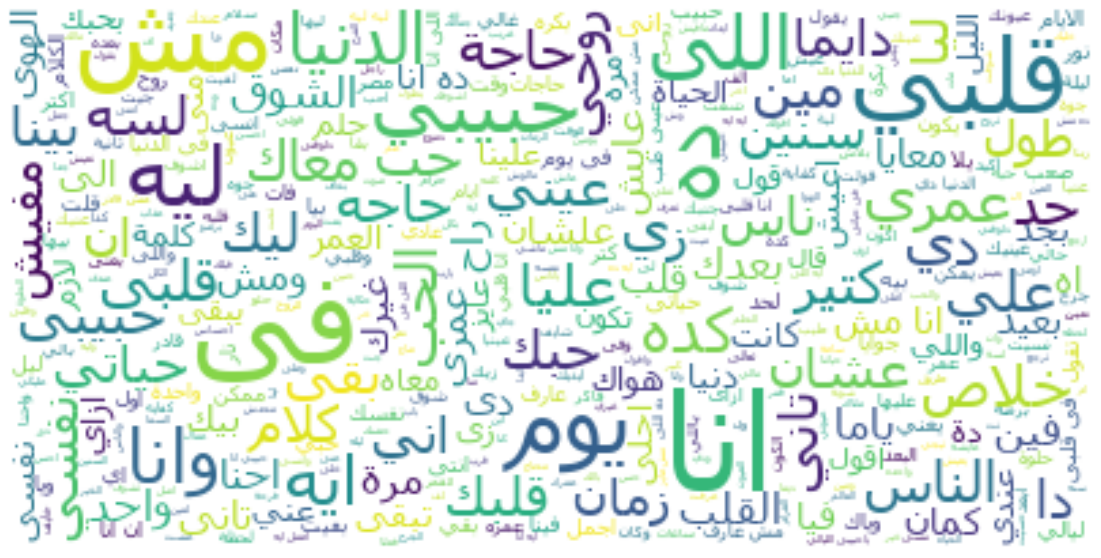

In [16]:
texts = Lyrics_df[Lyrics_df['SongDialect']=='egyptian'].Lyrics_lemmatized
texts = [''.join(word) for word in texts]
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(texts)))
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="/Users/arwaalgethami/Downloads/Tahoma-Font/Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 2630809 words in the combination of all review.


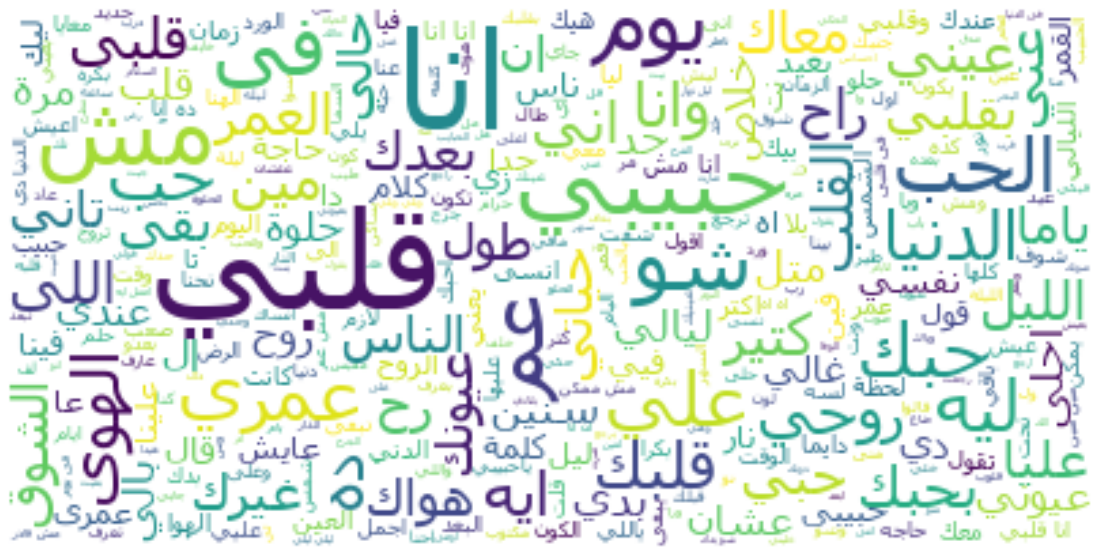

In [17]:
texts = Lyrics_df[Lyrics_df['SongDialect']=='levantine'].Lyrics_lemmatized
texts = [''.join(word) for word in texts]
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(texts)))
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="/Users/arwaalgethami/Downloads/Tahoma-Font/Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()